In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [ ]:
def load_vds_files(folder_path):
    vds_data = []
    for file_path in glob.glob(os.path.join(folder_path, "vds_*.xlsx")):
        year = int(file_path.split("_")[-1].split(".")[0])
        df = pd.read_excel(file_path)
        df_melted = df.melt(id_vars=["Отрасль"], var_name="Region", value_name="VDS_Value")
        df_melted["Year"] = year
        vds_data.append(df_melted)
    return pd.concat(vds_data, ignore_index=True)

vds_folder_path = "./data"
vds_df = load_vds_files(vds_folder_path)

In [30]:
vds_df

,Отрасль,Region,VDS_Value,Year
0,"Сельское, лесное и рыбное хозяйство",Акмолинская,499.9,2010
1,Промышленность,Акмолинская,2246.9,2010
2,Горнодобывающая промышленность и разработка ка...,Акмолинская,2253.6,2010
3,Обрабатывающая промышленность,Акмолинская,2610.8,2010
4,"Электроснабжение, подача газа, пара и воздушно...",Акмолинская,1535.9,2010
...,...,...,...,...
4795,Государственное управление и оборона; обязател...,г. Шымкент,5023.5,2023
4796,Образование,г. Шымкент,4234.4,2023
4797,Здравоохранение и социальное обслуживание насе...,г. Шымкент,6092.4,2023
4798,"Искусство, развлечения и отдых",г. Шымкент,3911.1,2023


In [ ]:
sphere_mapping = {
    "Снабжение электроэнергией, газом, паром, горячей водой и кондиционированным воздухом": "Электроснабжение, подача газа, пара и воздушное кондиционирование",
    "Водоснабжение сбор, обработка и удаление отходов; деятельность поликвидации загрязнений": "Водоснабжение; канализационная система, контроль над сбором и распределением отходов",
    "Здравоохранение и социальное обслуживание населения": "Здравоохранение и социальные услуги"
}
vds_df["Отрасль"] = vds_df["Отрасль"].replace(sphere_mapping)

In [39]:
city_mapping = {
    "г. Нур-Султан": "г. Астана",
    "Карагандиская": "Карагандинская"
}
vds_df["Region"] = vds_df["Region"].replace(city_mapping)

In [34]:
vds_df['Отрасль'].unique()

array(['Сельское, лесное и рыбное хозяйство', 'Промышленность',
       'Горнодобывающая промышленность и разработка карьеров',
       'Обрабатывающая промышленность',
       'Электроснабжение, подача газа, пара и воздушное кондиционирование',
       'Водоснабжение; канализационная система, контроль над сбором и распределением отходов',
       'Строительство',
       'Оптовая и розничная торговля;ремонт автомобилей и мотоциклов',
       'Транспорт и складирование', 'Услуги по проживанию и питанию',
       'Информация и связь', 'Финансовая и страховая деятельность',
       'Операции с недвижимым имуществом',
       'Профессиональная, научная и техническая деятельность',
       'Деятельность в области административного и вспомогательного обслуживания',
       'Государственное управление и оборона; обязательное социальное обеспечение',
       'Образование', 'Здравоохранение и социальные услуги',
       'Искусство, развлечения и отдых',
       'Предоставление прочих видов услуг ',
       'П

In [40]:
vds_df['Region'].unique()

array(['Акмолинская', 'Актюбинская', 'Алматинская', 'Атырауская',
       'Западно-Казахстанская', 'Жамбылская', 'Карагандинская',
       'Кызылординская', 'Мангистауская', 'Южно-Казахстанская',
       'Павлодарская', 'Северо-Казахстанская', 'Восточно-Казахстанская',
       'г. Астана', 'г. Алматы', 'Костанайская', 'Туркестанская',
       'г. Шымкент', 'Абай', 'Жетісу', 'Ұлытау'], dtype=object)

In [36]:
def load_gdp_file(gdp_file_path):
    # Load GDP data
    gdp_df = pd.read_excel(gdp_file_path)
    gdp_df_long = gdp_df.melt(id_vars=["Год"], var_name="Region", value_name="GDP")
    gdp_df_long = gdp_df_long.rename(columns={"Год": "Year"})
    
    return gdp_df_long

# Specify the path to your GDP file
gdp_file_path = "./data/gdp.xlsx"
gdp_df = load_gdp_file(gdp_file_path)

In [37]:
gdp_df = gdp_df.dropna()

In [42]:
gdp_df["Region"] = gdp_df["Region"].replace(city_mapping)

In [43]:
gdp_df["Region"].unique()

array(['Абай', 'Акмолинская', 'Актюбинская', 'Алматинская', 'Атырауская',
       'Западно-Казахстанская', 'Жамбылская', 'Жетісу', 'Карагандинская',
       'Костанайская', 'Кызылординская', 'Мангистауская', 'Павлодарская',
       'Северо-Казахстанская', 'Туркестанская', 'Ұлытау',
       'Восточно-Казахстанская', 'г. Астана', 'г. Алматы', 'г. Шымкент'],
      dtype=object)

In [44]:
gdp_df

,Year,Region,GDP
7,2022,Абай,2383753.4
8,2023,Абай,2801918.9
9,2014,Акмолинская,1051057.8
10,2015,Акмолинская,1121025.0
11,2016,Акмолинская,1344334.6
...,...,...,...
175,2018,г. Шымкент,2174125.4
176,2019,г. Шымкент,2202956.7
177,2020,г. Шымкент,2493240.9
178,2022,г. Шымкент,3294392.3


In [45]:
def create_lagged_features(df, lag_years=1):
    df = df.sort_values(by=["Region", "Year"]).reset_index(drop=True)

    # lagged features (gdp)
    for lag in range(1, lag_years + 1):
        df[f"GDP_Lag{lag}"] = df.groupby("Region")["GDP"].shift(lag)
        
    
    return df

# Create lagged features with 1 year lag for GDP, add VDS lag if desired
gdp_df = create_lagged_features(gdp_df, lag_years=1)

In [46]:
gdp_df

,Year,Region,GDP,GDP_Lag1
0,2022,Абай,2383753.4,NaN
1,2023,Абай,2801918.9,2383753.4
2,2014,Акмолинская,1051057.8,NaN
3,2015,Акмолинская,1121025.0,1051057.8
4,2016,Акмолинская,1344334.6,1121025.0
...,...,...,...,...
146,2020,г. Шымкент,2493240.9,2202956.7
147,2022,г. Шымкент,3294392.3,2493240.9
148,2023,г. Шымкент,4026601.9,3294392.3
149,2022,Ұлытау,1609739.8,NaN


In [47]:
merged_df = pd.merge(vds_df, gdp_df, on=["Year", "Region"], how="left")

In [48]:
merged_df

,Отрасль,Region,VDS_Value,Year,GDP,GDP_Lag1
0,"Сельское, лесное и рыбное хозяйство",Акмолинская,499.9,2010,NaN,NaN
1,Промышленность,Акмолинская,2246.9,2010,NaN,NaN
2,Горнодобывающая промышленность и разработка ка...,Акмолинская,2253.6,2010,NaN,NaN
3,Обрабатывающая промышленность,Акмолинская,2610.8,2010,NaN,NaN
4,"Электроснабжение, подача газа, пара и воздушно...",Акмолинская,1535.9,2010,NaN,NaN
...,...,...,...,...,...,...
4795,Государственное управление и оборона; обязател...,г. Шымкент,5023.5,2023,4026601.9,3294392.3
4796,Образование,г. Шымкент,4234.4,2023,4026601.9,3294392.3
4797,Здравоохранение и социальные услуги,г. Шымкент,6092.4,2023,4026601.9,3294392.3
4798,"Искусство, развлечения и отдых",г. Шымкент,3911.1,2023,4026601.9,3294392.3


In [78]:
final_df = merged_df

In [64]:
final_df

,Отрасль,Region,VDS_Value,Year,GDP,GDP_Lag1
0,"Сельское, лесное и рыбное хозяйство",Акмолинская,499.9,2010,NaN,NaN
1,Промышленность,Акмолинская,2246.9,2010,NaN,NaN
2,Горнодобывающая промышленность и разработка ка...,Акмолинская,2253.6,2010,NaN,NaN
3,Обрабатывающая промышленность,Акмолинская,2610.8,2010,NaN,NaN
4,"Электроснабжение, подача газа, пара и воздушно...",Акмолинская,1535.9,2010,NaN,NaN
...,...,...,...,...,...,...
4795,Государственное управление и оборона; обязател...,г. Шымкент,5023.5,2023,4026601.9,3294392.3
4796,Образование,г. Шымкент,4234.4,2023,4026601.9,3294392.3
4797,Здравоохранение и социальные услуги,г. Шымкент,6092.4,2023,4026601.9,3294392.3
4798,"Искусство, развлечения и отдых",г. Шымкент,3911.1,2023,4026601.9,3294392.3


In [71]:
final_df['Region'].unique()

array(['Акмолинская', 'Актюбинская', 'Алматинская', 'Атырауская',
       'Западно-Казахстанская', 'Жамбылская', 'Карагандинская',
       'Кызылординская', 'Мангистауская', 'Южно-Казахстанская',
       'Павлодарская', 'Северо-Казахстанская', 'Восточно-Казахстанская',
       'г. Астана', 'г. Алматы', 'Костанайская', 'Туркестанская',
       'г. Шымкент', 'Абай', 'Жетісу', 'Ұлытау'], dtype=object)

In [79]:
final_df = pd.get_dummies(final_df, columns=["Region"], drop_first=True)

In [67]:
final_df

,Отрасль,VDS_Value,Year,GDP,GDP_Lag1,Region_Акмолинская,Region_Актюбинская,Region_Алматинская,Region_Атырауская,Region_Восточно-Казахстанская,...,Region_Кызылординская,Region_Мангистауская,Region_Павлодарская,Region_Северо-Казахстанская,Region_Туркестанская,Region_Южно-Казахстанская,Region_г. Алматы,Region_г. Астана,Region_г. Шымкент,Region_Ұлытау
0,"Сельское, лесное и рыбное хозяйство",499.9,2010,NaN,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Промышленность,2246.9,2010,NaN,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Горнодобывающая промышленность и разработка ка...,2253.6,2010,NaN,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Обрабатывающая промышленность,2610.8,2010,NaN,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Электроснабжение, подача газа, пара и воздушно...",1535.9,2010,NaN,NaN,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,Государственное управление и оборона; обязател...,5023.5,2023,4026601.9,3294392.3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4796,Образование,4234.4,2023,4026601.9,3294392.3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4797,Здравоохранение и социальные услуги,6092.4,2023,4026601.9,3294392.3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4798,"Искусство, развлечения и отдых",3911.1,2023,4026601.9,3294392.3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


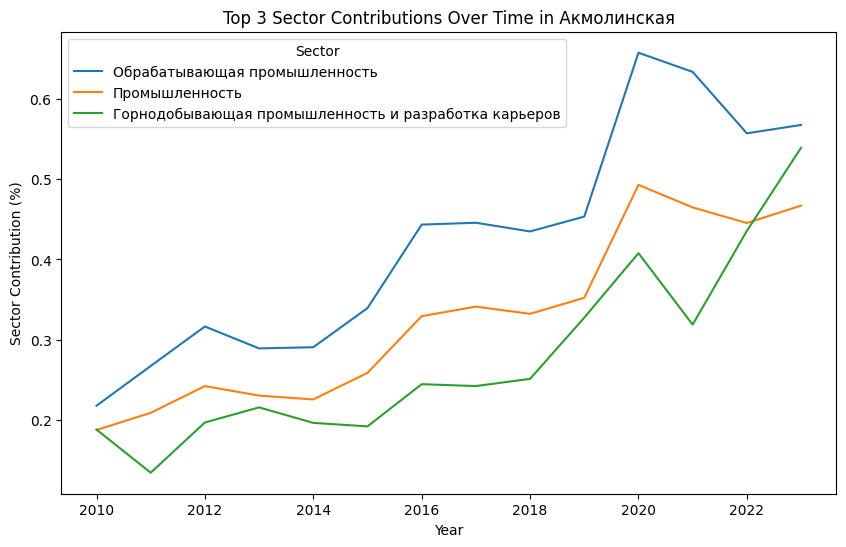

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


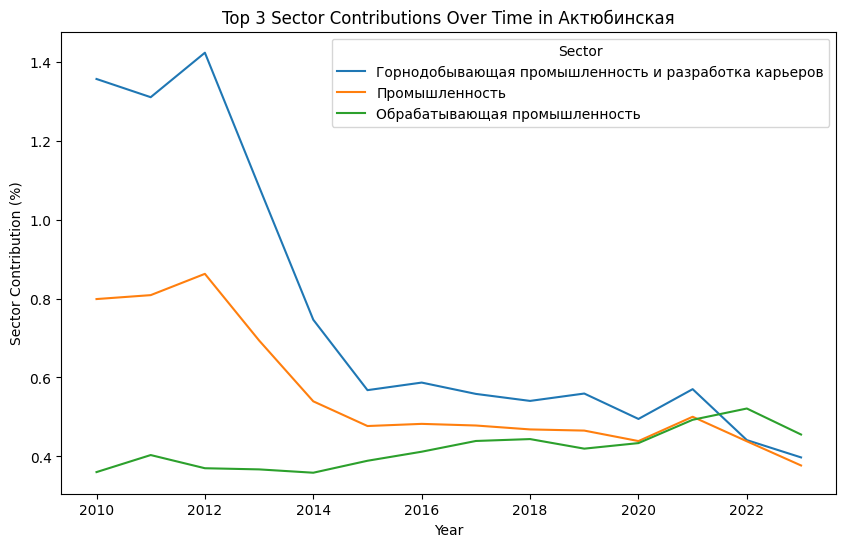

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


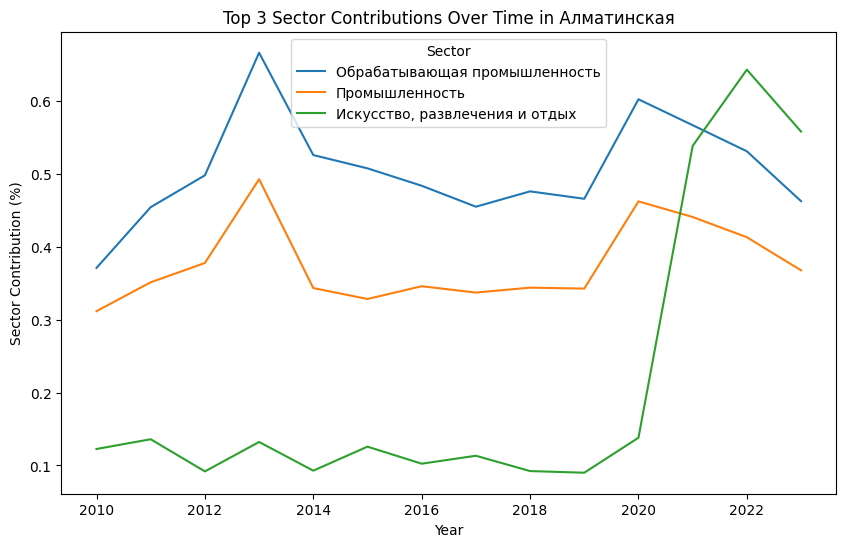

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


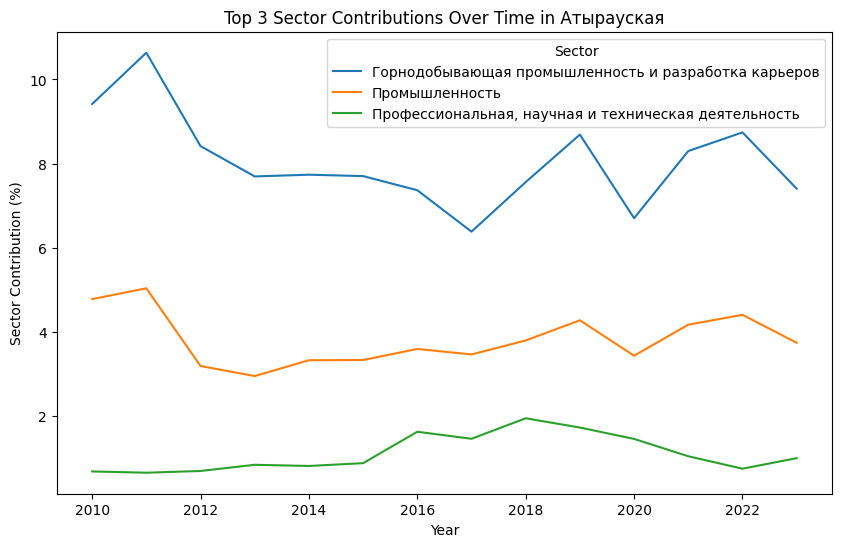

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


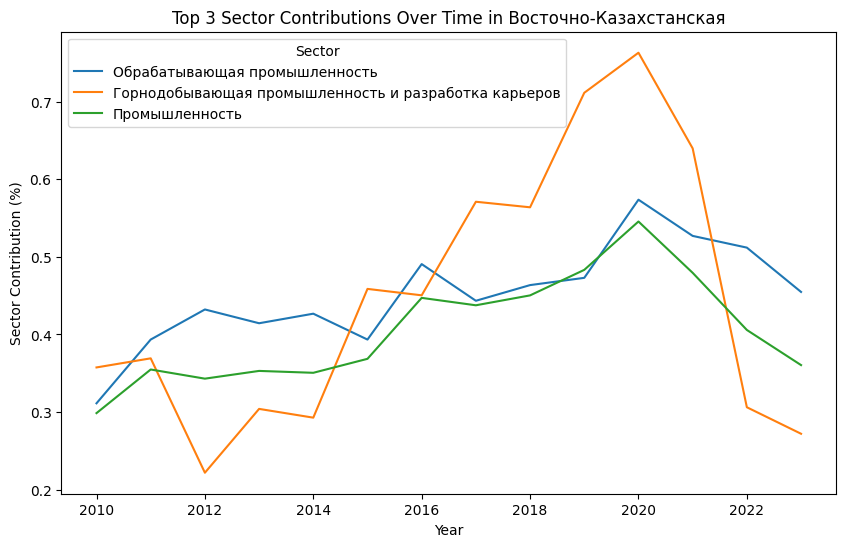

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


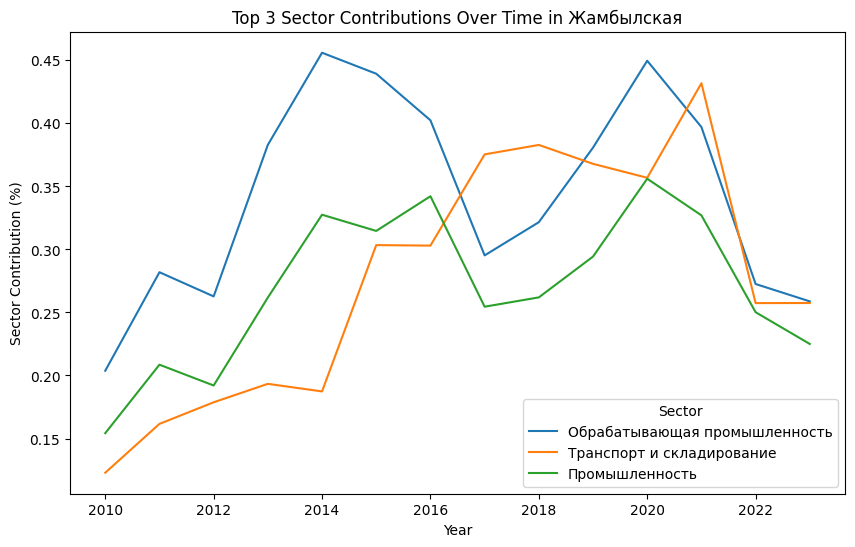

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


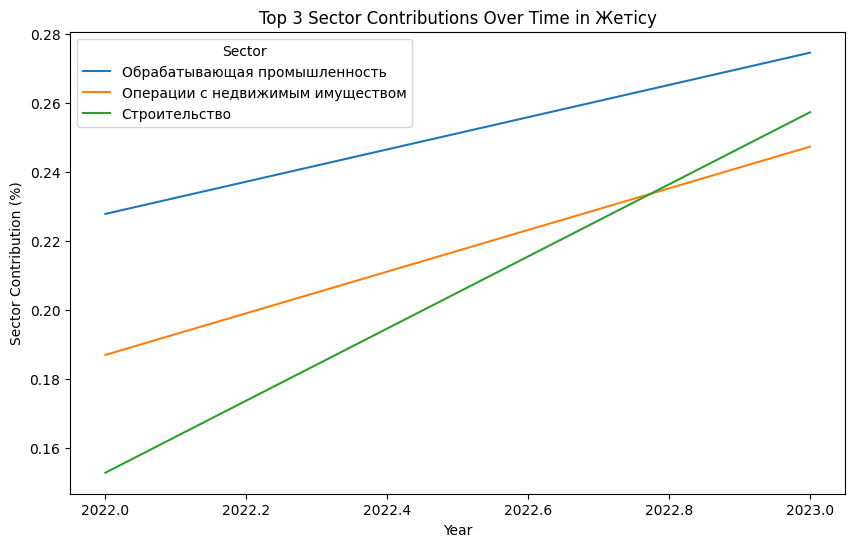

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


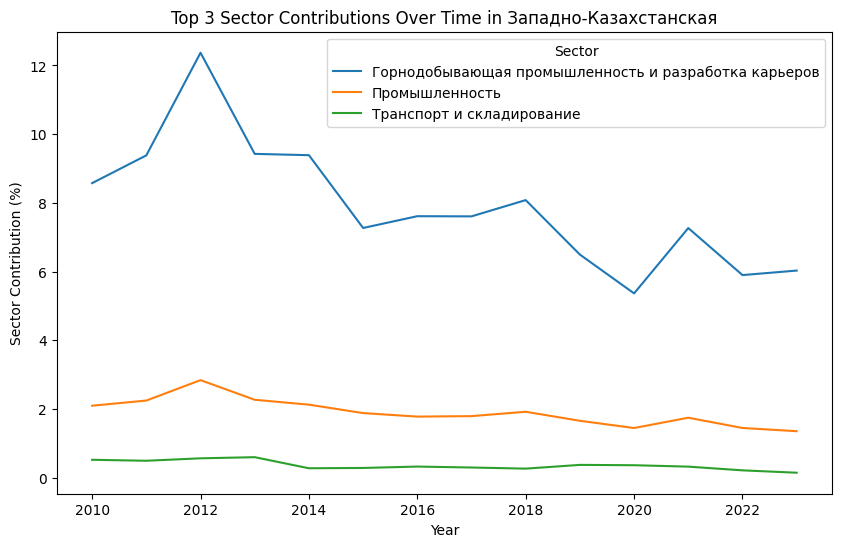

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


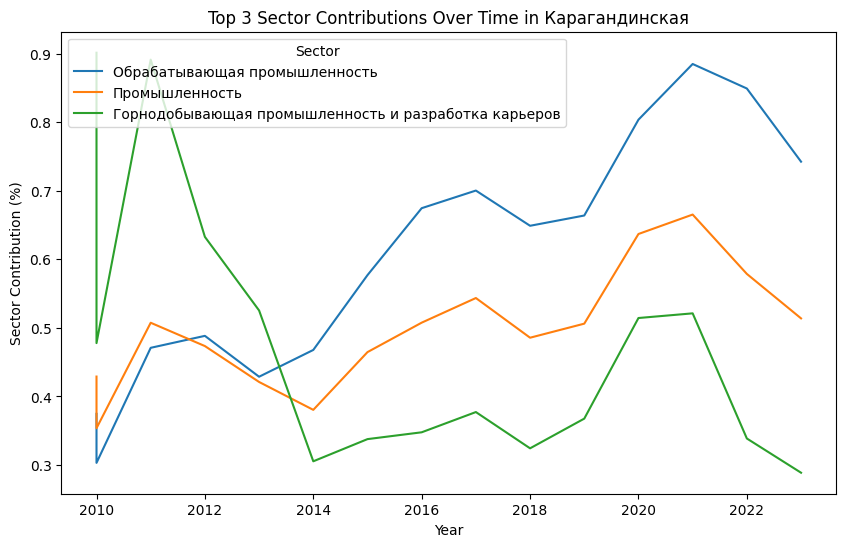

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


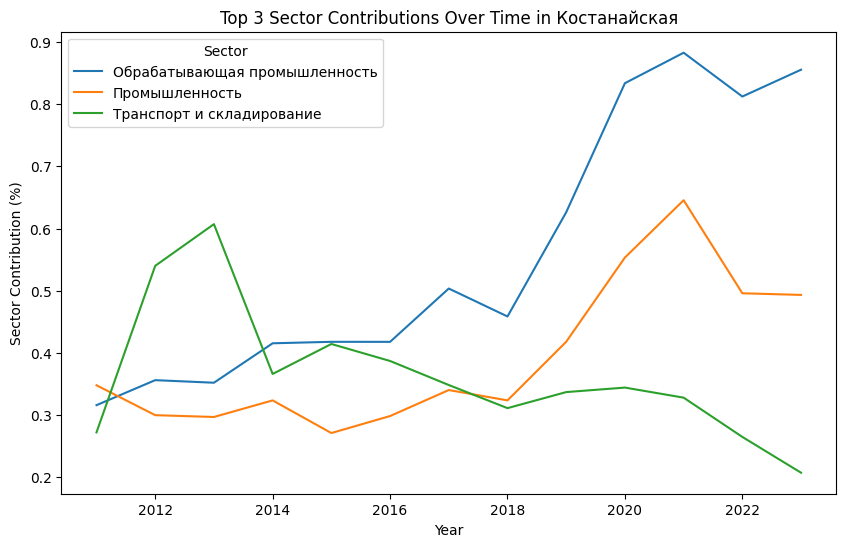

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


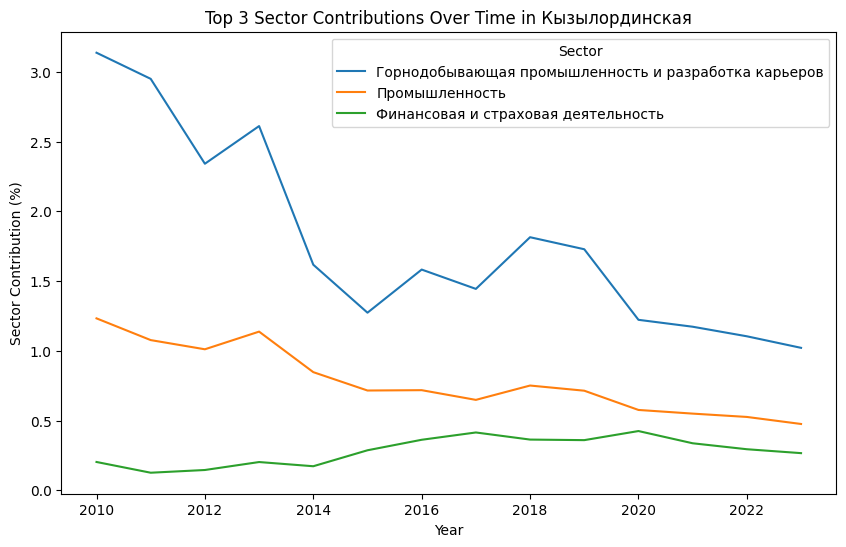

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


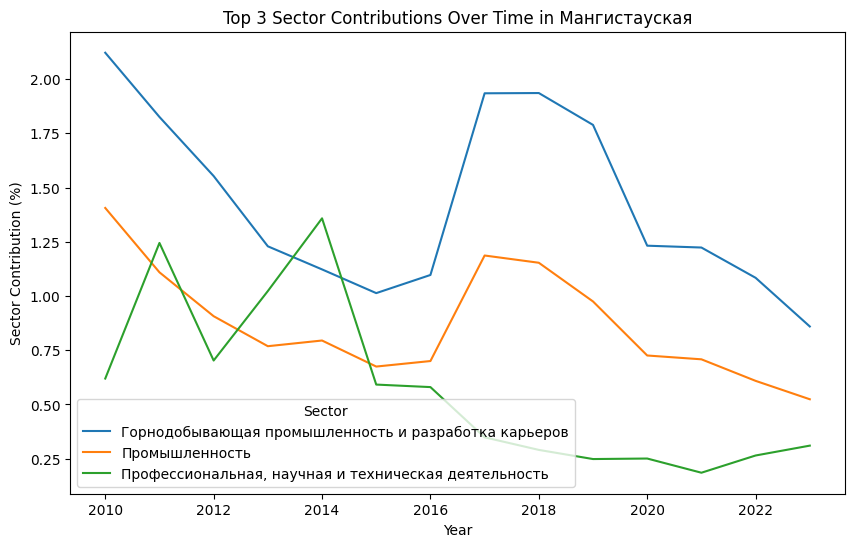

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


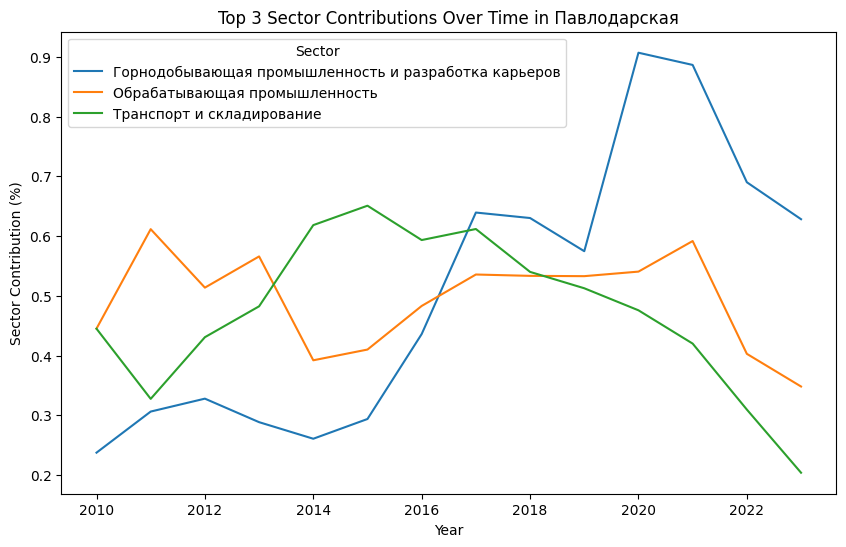

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


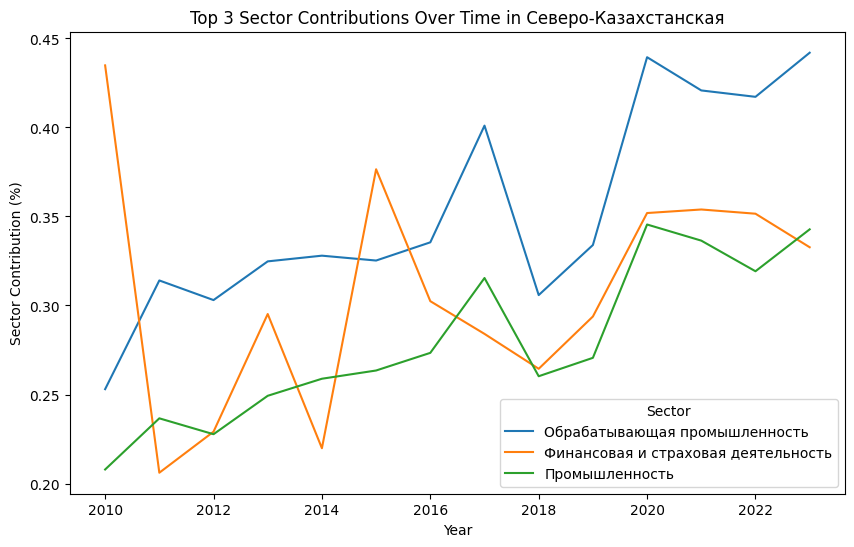

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


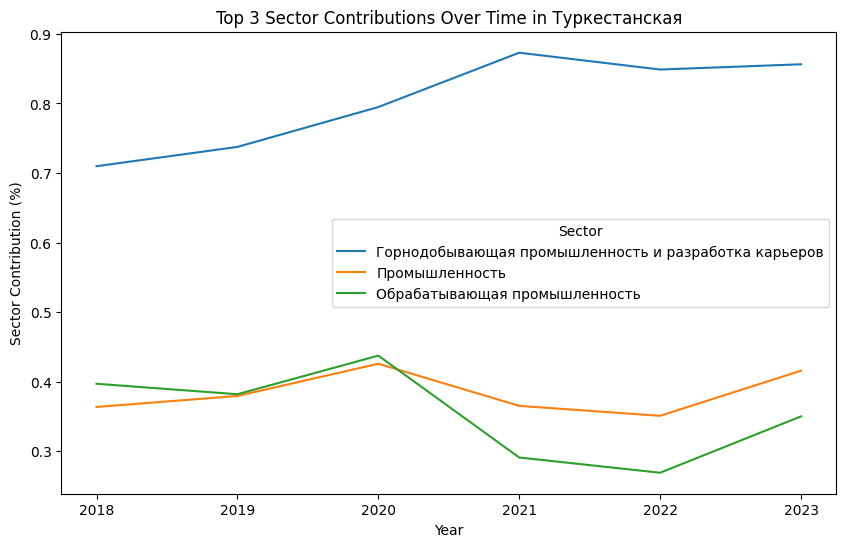

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


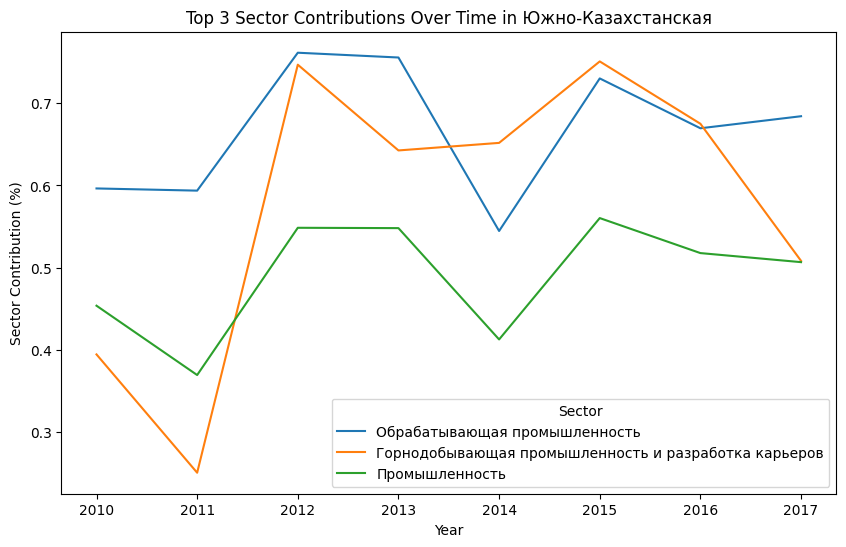

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


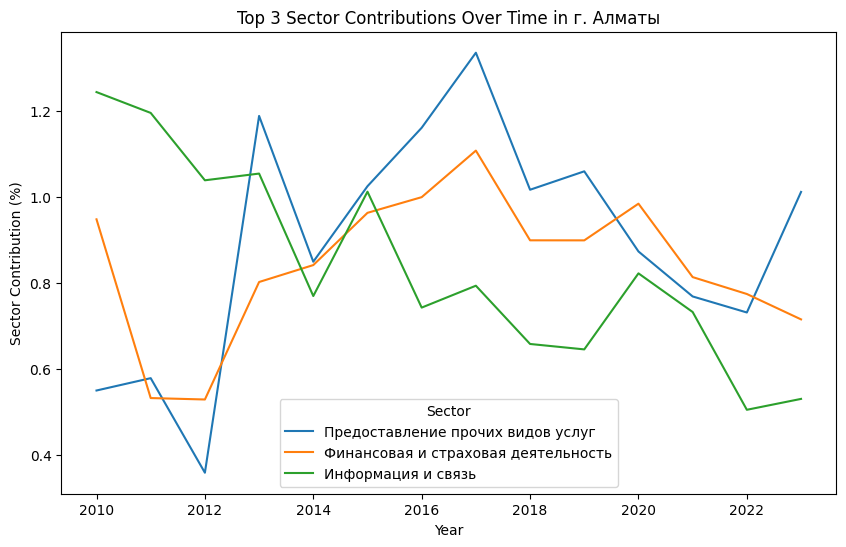

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


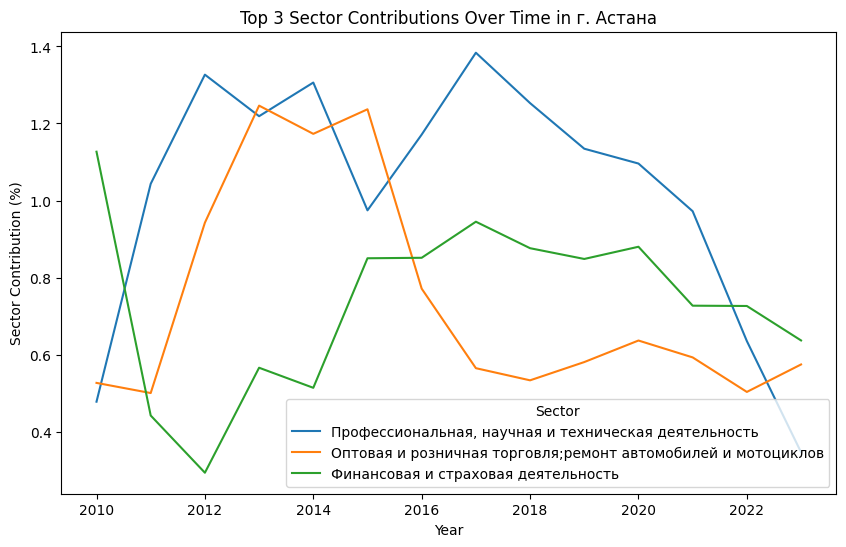

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


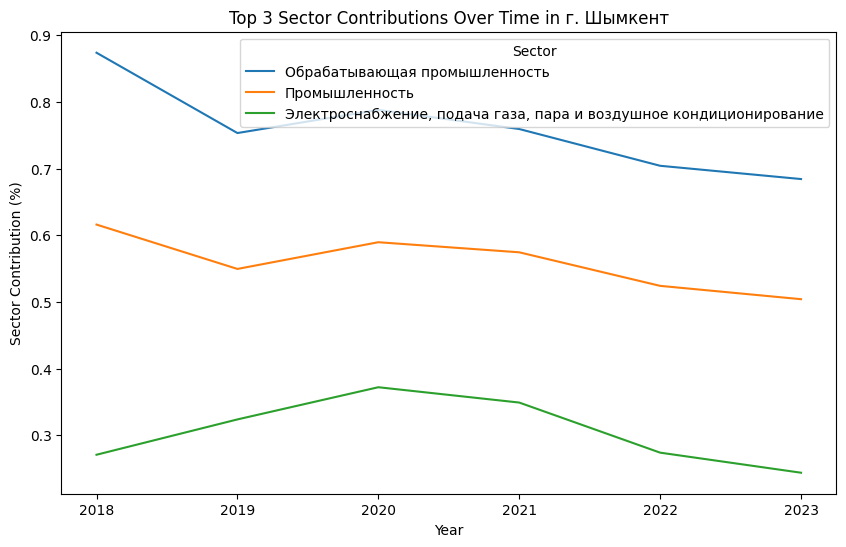

C:\Users\User\AppData\Local\Temp\ipykernel_49164\3387806940.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100


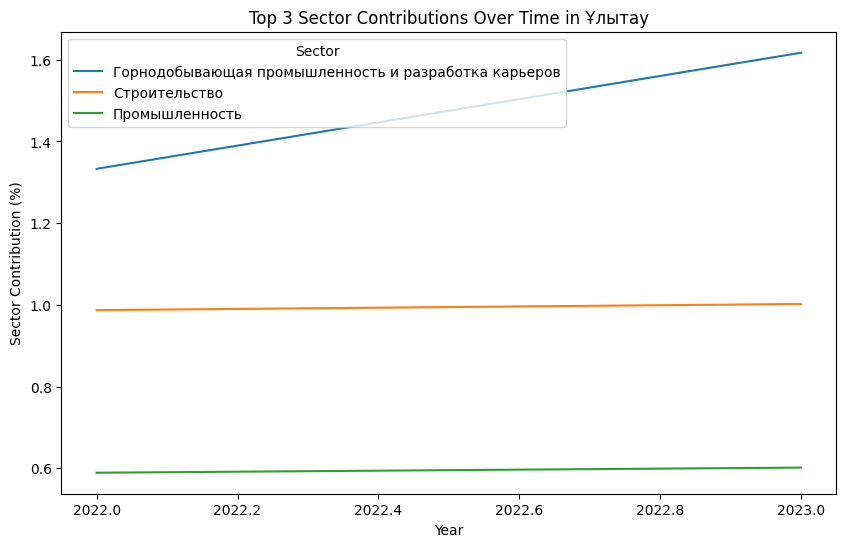

In [ ]:
final_df = merged_df
final_df = pd.get_dummies(final_df, columns=["Region"], drop_first=True)

vds_totals = final_df.groupby("Year")["VDS_Value"].sum().reset_index()
final_df = final_df.merge(vds_totals, on="Year", suffixes=("", "_YearTotal"))

for region_col in [col for col in final_df.columns if col.startswith("Region_")]:
    region_data = final_df[final_df[region_col] == 1]
    region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100
    top_sectors = region_data.groupby("Отрасль")["Sector_Contribution"].mean().nlargest(3).index

    plt.figure(figsize=(10, 6))
    for sector in top_sectors:
        sector_data = region_data[region_data["Отрасль"] == sector]
        plt.plot(sector_data["Year"], sector_data["Sector_Contribution"], label=sector)
    plt.title(f"Top 3 Sector Contributions Over Time in {region_col.replace('Region_', '')}")
    plt.xlabel("Year")
    plt.ylabel("Sector Contribution (%)")
    plt.legend(title="Sector")
    plt.show()

In [ ]:
final_df = merged_df
final_df = pd.get_dummies(final_df, columns=["Region"], drop_first=True)

vds_totals = final_df.groupby("Year")["VDS_Value"].sum().reset_index()
final_df = final_df.merge(vds_totals, on="Year", suffixes=("", "_YearTotal"))
region_sector_rankings = {}

for region_col in [col for col in final_df.columns if col.startswith("Region_")]:
    region_data = final_df[final_df[region_col] == 1]
    region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100
    avg_contributions = region_data.groupby("Отрасль")["Sector_Contribution"].mean().sort_values(ascending=False)
    region_name = region_col.replace("Region_", "")
    region_sector_rankings[region_name] = avg_contributions
rankings_df = pd.DataFrame(region_sector_rankings)


C:\Users\User\AppData\Local\Temp\ipykernel_49164\4226984552.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100
C:\Users\User\AppData\Local\Temp\ipykernel_49164\4226984552.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_data["Sector_Contribution"] = region_data["VDS_Value"] / region_data["VDS_Value_YearTotal"] * 100
C:\Users\User\AppData\Local\Temp\ipykernel_49164\4226984552.py:19: SettingWi

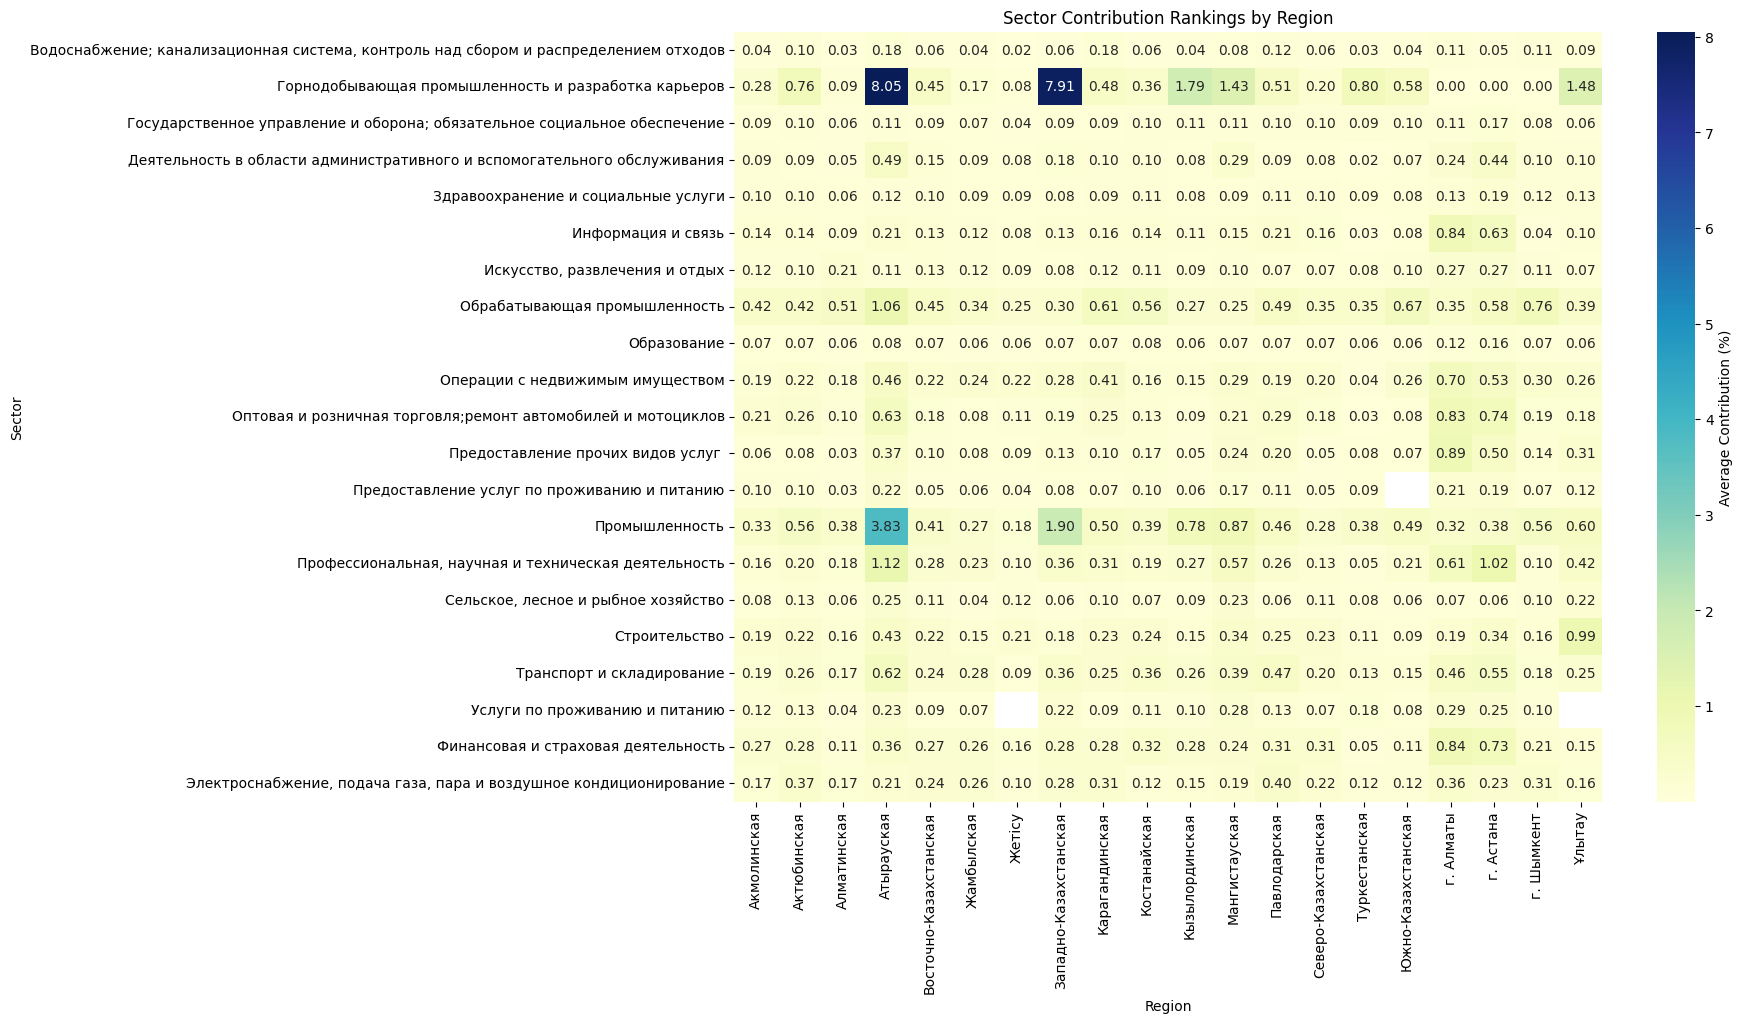

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(rankings_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Contribution (%)'})
plt.title("Sector Contribution Rankings by Region")
plt.xlabel("Region")
plt.ylabel("Sector")
plt.show()

In [87]:
normalized_rankings_df = rankings_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

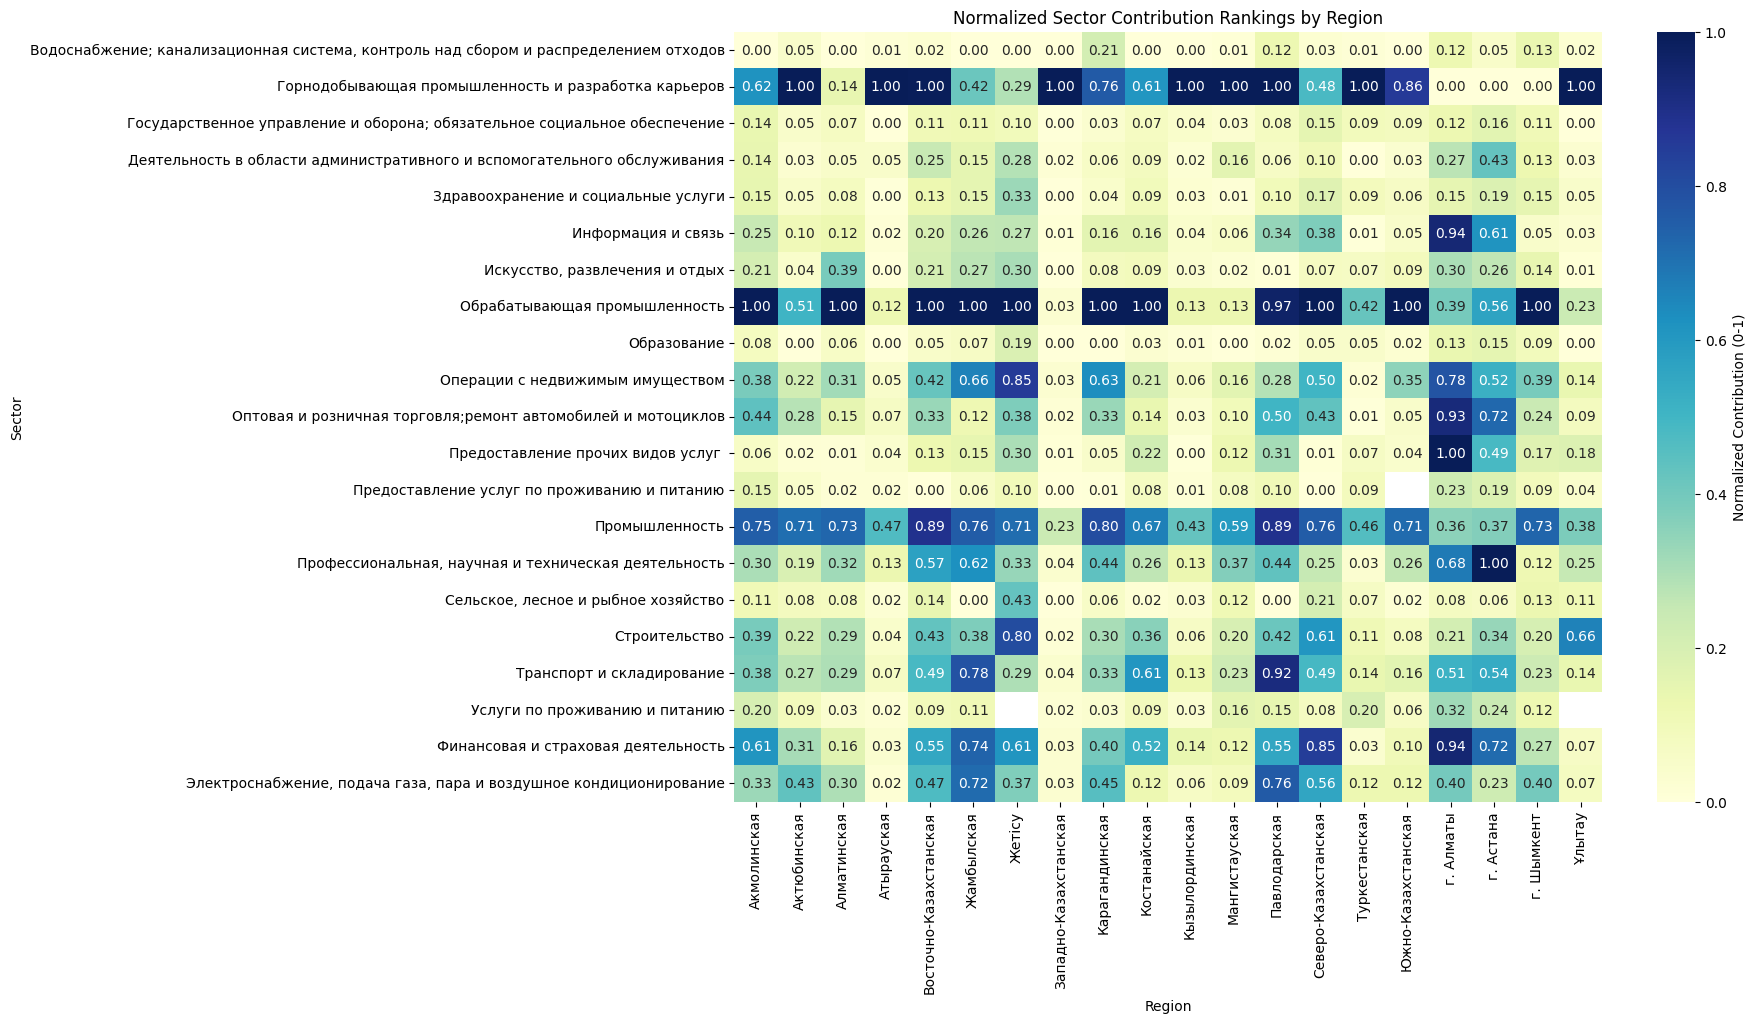

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(normalized_rankings_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Normalized Contribution (0-1)'})
plt.title("Normalized Sector Contribution Rankings by Region")
plt.xlabel("Region")
plt.ylabel("Sector")
plt.show()